# Papers Clustering

Clustering papers to make analysis easier.

In [117]:
import pandas as pd

merged_papers_path = "../recommender_systems/scraper_merged_results/scraped_merged_results.xlsx"
papers_df = pd.read_excel(merged_papers_path)

papers_df.head()

,Index,Article Type,Title,Authors,Publication Source,Publication Year,Citations,Importance Rate,Impact Factor,Article Link,BibTex,Synopsis
0,1,1,Reinforcement Learning based Recommender Syste...,"B. Far, M. Afsar, T. Crump",ACM Computing Surveys,2021,102,2.999011,,https://www.semanticscholar.org/paper/5685abf9...,"@['JournalArticle', 'Review']{Afsar2021Reinfor...",Recommender systems (RSs) have become an insep...
1,2,1,Management of Immune-Related Adverse Events in...,"A. Naing, A. Spira, B. Santomasso, B. Schneide...",Journal of Clinical Oncology,2021,251,2.999011,,https://www.semanticscholar.org/paper/b20e7551...,"@['JournalArticle', 'Review']{Schneider2021Man...","PURPOSE To increase awareness, outline strateg..."
2,3,1,Resolving data sparsity and cold start problem...,"A. Gandomi, S. Natarajan, Sivaramakrishnan R. ...",Expert systems with applications,2020,102,2.998517,,https://www.semanticscholar.org/paper/9bb61225...,"@['JournalArticle']{Natarajan2020ResolvingDS,\...",No synopsis
3,4,1,Bias and Debias in Recommender System: A Surve...,"Fuli Feng, Hande Dong, Jiawei Chen, Meng Wang,...",ACM Transactions on Information Systems,2020,246,2.998517,,https://www.semanticscholar.org/paper/9779f919...,"@['JournalArticle', 'Review']{Chen2020BiasAD,\...",While recent years have witnessed a rapid grow...
4,5,1,High-performance medicine: the convergence of ...,E. Topol,Nature Network Boston,2019,2260,2.998023,,https://www.semanticscholar.org/paper/2231aff2...,"@['Review', 'JournalArticle']{Topol2019High-pe...",No synopsis


## Encoding the dataset

We will encode the `Title` feature using _tf-idf_ encoder, so we can use it to clusterize similar articles.

In [118]:
'''
Creating TF-IDF vectorizer
'''
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

additional_stop_words = [
   "chinese", 
   "based", 
   "covid", 
   "covid 19", 
   "using", 
   "19", 
   "17", 
]

total_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
total_stop_words = list(total_stop_words)

tfidf_vectorizer = TfidfVectorizer(
    analyzer="word",
    stop_words=total_stop_words,
    ngram_range=(1, 2),
)

In [119]:
'''
Encoding using TF-IDF
'''
X = tfidf_vectorizer.fit_transform(papers_df["Title"])
f_names = tfidf_vectorizer.get_feature_names_out()

tfidf_data = pd.DataFrame(X.toarray(), columns=f_names)
tfidf_data.head()

,18f,18f fdg,201,201 american,2017,2017 observational,2019,2019 traditional,2022,21st,...,yoga therapy,youtube,youtube network,youtube recommender,yum,yum personalized,zero,zero preventable,zipf,zipf law
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Aplying K-means

Now with the `Title` feature encoded we apply _K-means_ to discover the most "famous" recurrent topics.

In [120]:
# Applying K-means
from sklearn.cluster import KMeans

n_clusters = 8 

kmeans = KMeans(n_clusters=n_clusters)
papers_df["Cluster"] = kmeans.fit_predict(X)
papers_df["Cluster"] = papers_df["Cluster"].astype("category")

papers_df.head()

/home/guilherme/Mestrado/recommender_systems/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Index,Article Type,Title,Authors,Publication Source,Publication Year,Citations,Importance Rate,Impact Factor,Article Link,BibTex,Synopsis,Cluster
0,1,1,Reinforcement Learning based Recommender Syste...,"B. Far, M. Afsar, T. Crump",ACM Computing Surveys,2021,102,2.999011,,https://www.semanticscholar.org/paper/5685abf9...,"@['JournalArticle', 'Review']{Afsar2021Reinfor...",Recommender systems (RSs) have become an insep...,5
1,2,1,Management of Immune-Related Adverse Events in...,"A. Naing, A. Spira, B. Santomasso, B. Schneide...",Journal of Clinical Oncology,2021,251,2.999011,,https://www.semanticscholar.org/paper/b20e7551...,"@['JournalArticle', 'Review']{Schneider2021Man...","PURPOSE To increase awareness, outline strateg...",6
2,3,1,Resolving data sparsity and cold start problem...,"A. Gandomi, S. Natarajan, Sivaramakrishnan R. ...",Expert systems with applications,2020,102,2.998517,,https://www.semanticscholar.org/paper/9bb61225...,"@['JournalArticle']{Natarajan2020ResolvingDS,\...",No synopsis,0
3,4,1,Bias and Debias in Recommender System: A Surve...,"Fuli Feng, Hande Dong, Jiawei Chen, Meng Wang,...",ACM Transactions on Information Systems,2020,246,2.998517,,https://www.semanticscholar.org/paper/9779f919...,"@['JournalArticle', 'Review']{Chen2020BiasAD,\...",While recent years have witnessed a rapid grow...,7
4,5,1,High-performance medicine: the convergence of ...,E. Topol,Nature Network Boston,2019,2260,2.998023,,https://www.semanticscholar.org/paper/2231aff2...,"@['Review', 'JournalArticle']{Topol2019High-pe...",No synopsis,2


## Analysing - Getting the most recurrent words in each cluster and displaying them as word cloud

### Getting the most recurrent words from each cluster

In [121]:
def get_n_most_recurrent_words_from_cluster(
    cluster_number: int,
    n: int,
):
    '''
    gets the n most recurrent words and returns in pandas.Series format
    '''
    clusters_papers = papers_df[papers_df.Cluster == cluster_number]
    clusters_words = tfidf_data[tfidf_data.index.isin(clusters_papers.index)]

    most_recurrent_words = clusters_words.sum()
    most_recurrent_words = most_recurrent_words.sort_values(ascending=False)

    return most_recurrent_words.head(n)

In [122]:
n = 50
'''
cluster words is a vector of pandas.Series that contains the most frequent words in each cluster.
each cluster number is the same as the vector index.
'''
cluster_words = []

for c in range(0, n_clusters -1):
    cluster_words.append(
        get_n_most_recurrent_words_from_cluster(
            cluster_number=c,
            n=n
        )
    )
   

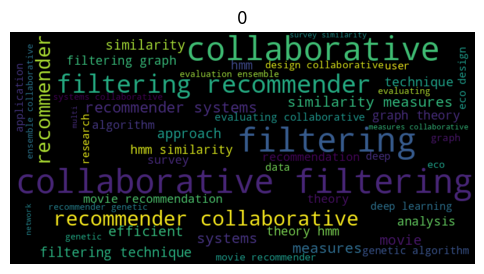

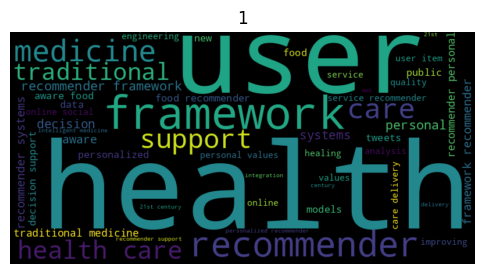

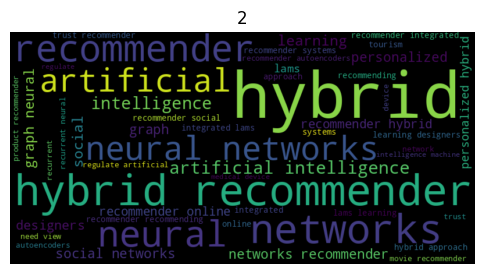

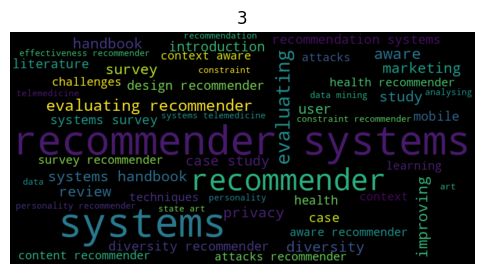

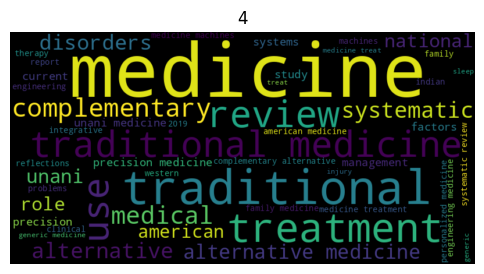

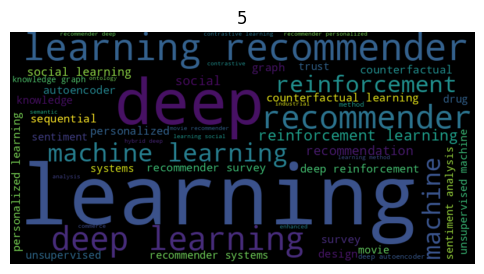

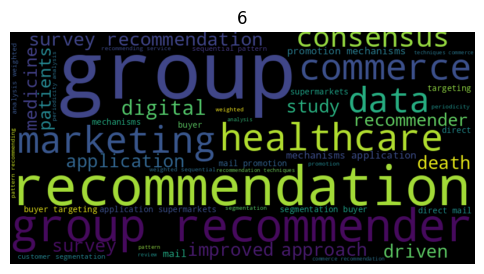

In [123]:
from wordcloud import WordCloud
'''
cluster words is a vector of dictionary those dictionaries have the frequency of word(got by using TF-IDF).
'''
cluster_words_dict = []

for cw in cluster_words:
   cluster_words_dict.append(cw.to_dict()) 


for n,word_dict  in enumerate(cluster_words_dict):
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_dict)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 6))
    plt.title(n)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Save clustered data to csv

In [ ]:
merged_papers_clustered = "../recommender_systems/scraper_merged_results/scraped_merged_results_clustered.csv"
papers_df.to_csv(merged_papers_clustered)